# **Lab1: Regression**
In *lab 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict people's grip force from their weight.
You can use either Matrix Inversion or Gradient Descent.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict grip force in a different way (for example, with more variables) than the basic part




---
# 1. Basic Part (50%)
In the first part, you need to implement the regression to predict grip force

Please save the prediction result in a CSV file and submit it to Kaggle

### Import Packages

> Note: You **cannot** import any other package


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

C:\Users\Utin Liu\AppData\Local\Temp\ipykernel_21216\3425457675.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Global attributes
Define the global attributes\
You can also add your own global attributes here

In [3]:
training_dataroot = 'lab1_basic_training.csv' # Training data file file named as 'lab1_basic_training.csv'
testing_dataroot = 'lab1_basic_testing.csv'   # Testing data file named as 'lab1_basic_testing.csv'
output_dataroot = 'lab1_basic.csv' # Output file will be named as 'lab1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 100 elements
dataType = {'weight': 0, 'gripForce': 1}

### Load the Input File
First, load the basic input file **lab1_basic_training.csv** and **lab1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [4]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

### <i> Plot Functions</i>

In [5]:
def plotChart(gender, attribute, dataset):
    """Plot the scatter chart for the attribute and grip force

    Args:
        gender (str): 'male' or 'female'
        attribute (str): 'age', 'height', 'weight', 'bodyFat', 'diastolic', 'systolic'
        dataset (2Darray): _description_
    """
    plot_x = dataset[:, dataType[attribute]]
    plot_y = dataset[:, -1]
    plt.scatter(plot_x, plot_y, marker='o')
    plt.title(attribute + " - grip force")
    plt.xlabel(gender + ' ' + attribute)
    plt.ylabel("grip force")
    plt.show()

def plotChartBMIMale(gender, dataset):
    """Plot the scatter chart for male BMI and grip force
        
    Args:
        gender (str): 'male' or 'female'
        dataset (2Darray): dataset
    """
    plot_x = dataset[:, dataType["weight"]] / ((dataset[:, dataType["height"]] * 0.01) ** 2)
    plot_y = dataset[:, -1]
    plt.scatter(plot_x, plot_y, marker='o')
    plt.title("BMI" + " - grip force")
    plt.xlabel(gender + ' ' + "BMI")
    plt.ylabel("grip force")
    plt.show()
    
def plotChartBMIFemale(gender, dataset):
    """Plot the scatter chart for female BMI and grip force
    
    Args:
        gender (str): 'male' or 'female'
        dataset (2Darray): dataset
    """
    plot_x = dataset[:, dataType["weight"]] / ((dataset[:, dataType["height"]] * 0.01) ** 2)
    plot_y = dataset[:, -1]
    plt.scatter(plot_x, plot_y, marker='o')
    plt.title("BMI" + " - grip force")
    plt.xlabel(gender + ' ' + "BMI")
    plt.ylabel("grip force")
    plt.show()

### Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions

#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset


In [6]:
def SplitData(data, split_ratio):
    """
    Splits the given dataset into training and validation sets based on the specified split ratio.

    Parameters:
    - data (numpy.ndarray): The dataset to be split. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
    - split_ratio (float): The ratio of the data to be used for training. For example, a value of 0.8 means 80% of the data will be used for training and the remaining 20% for validation.

    Returns:
    - training_data (numpy.ndarray): The portion of the dataset used for training.
    - validation_data (numpy.ndarray): The portion of the dataset used for validation.

    """
    training_data = []
    validation_data = []

    # TODO
    data_length = len(data)
    training_data_length = math.floor(data_length * split_ratio)
    random_index = random.sample(range(0, data_length), data_length)
    training_data_index = random_index[:training_data_length]
    validation_data_index = random_index[training_data_length + 1:]
    for idx in training_data_index:
        training_data.append(data[idx])
    for idx in validation_data_index:
        validation_data.append(data[idx])
        
    training_data = np.array(training_data)
    validation_data = np.array(validation_data)

    return training_data, validation_data



#### Step 2: Preprocess Data
Handle unreasonable data and missing data

> Hint 1: Outliers and missing data can be addressed by either removing them or replacing them using statistical methods (e.g., the mean of all data).

> Hint 2: Missing data are represented as `np.nan`, so functions like `np.isnan()` can be used to detect them.

> Hint 3: Methods such as the Interquartile Range (IQR) can help detect outliers

In [7]:
def PreprocessData(data):
    """
    Preprocess the given dataset and return the result.

    Parameters:
    - data (numpy.ndarray): The dataset to preprocess. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
    - x_type: string
    
    Returns:
    - preprocessedData (numpy.ndarray): Preprocessed data.
    """
    preprocessedData = []
    x_data = 0
    y_data = 1

    # TODO
    noNanData = []
    for row in range(len(data)):
        isNan = np.isnan(data[row][x_data]) or np.isnan(data[row][y_data]) 
        if not isNan:
            noNanData.append(data[row])
    
    noNanData = np.array(noNanData)
    
    x_data = noNanData[:, 0]
    y_data = noNanData[:, -1]
    
    x_q1 = np.percentile(x_data, 25)
    x_q3 = np.percentile(x_data, 75)
    x_qd = x_q3 - x_q1
    y_q1 = np.percentile(y_data, 25)
    y_q3 = np.percentile(y_data, 75)
    y_qd = y_q3 - y_q1
    
    x_upper_bound = x_q3 + 1.5 * x_qd
    x_lower_bound = x_q1 - 1.5 * x_qd
    y_upper_bound = y_q3 + 1.5 * y_qd
    y_lower_bound = y_q1 - 1.5 * y_qd
    
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    
    for row in range(len(noNanData)):
        x_out_of_bound = x_data[row] > x_upper_bound or x_data[row] < x_lower_bound
        y_out_of_bound = y_data[row] > y_upper_bound or y_data[row] < y_lower_bound
        is_error_data = x_out_of_bound or y_out_of_bound
                
        if (not is_error_data):
            preprocessedData.append([x_data[row], y_data[row]])
        # else:
        #     preprocessedData.append([x_mean, y_mean])
            
    preprocessedData = np.array(preprocessedData)

    return preprocessedData

### Step 3: Implement Regression
You have to use Gradient Descent to finish this part

In [8]:
def Regression(dataset):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """
      
    X = dataset[:, :1]
    y = dataset[:, 1]

    # TODO: Decide on the degree of the polynomial
    degree = 1  # For example, quadratic regression

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))  # Add x^d terms to feature matrix

    # Initialize coefficients (weights) to zero
    num_dimensions = X_poly.shape[1]  # Number of features (including intercept and polynomial terms)
    w = np.zeros(num_dimensions)

    # TODO: Set hyperparameters
    num_iteration = 2000000
    learning_rate = 0.00000001

    # Gradient Descent
    m = len(y)  # Number of data points
    g = np.zeros(num_dimensions)
    for iteration in range(num_iteration):
        # TODO: Prediction using current weights and compute error
        predicted_y = X_poly.dot(w)
        err = y - predicted_y

        # TODO: Compute gradient
        g = -2 * X_poly.T.dot(err)

        # TODO: Update the weights
        w = w - learning_rate * g

        # TODO: Optionally, print the cost every 100 iterations
        if iteration % 100 == 0:
            cost = np.sum((1 / m) * abs(err / y))
            print(f"Iteration {iteration}, Cost: {cost}")
            
    return w


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [9]:
def MakePrediction(w, test_dataset):
    """
    Predicts the output for a given test dataset using a regression model.

    Parameters:
    - w (numpy.ndarray): The coefficients of the model, where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - test_dataset (numpy.ndarray): A 1D array containing the input values (independent variable)
                                          for which predictions are to be made.

    Returns:
    - list/numpy.ndarray: A list or 1d array of predicted values corresponding to each input value in the test dataset.
    """
    prediction = []

    # TODO
    for idx in range(len(test_dataset)):
        predicted_y = 0
        for dim in range(len(w)):
            predicted_y += w[dim] * (test_dataset[idx][0] ** dim)
        prediction.append(predicted_y)
    
    prediction = np.array(prediction)
    return prediction


### Step 5: Train Model and Generate Result

Use the above functions to train your model on training dataset, and predict the answer of testing dataset.

Save your predicted values in `output_datalist`

> Notice: **Remember to inclue the coefficients of your model in the report**



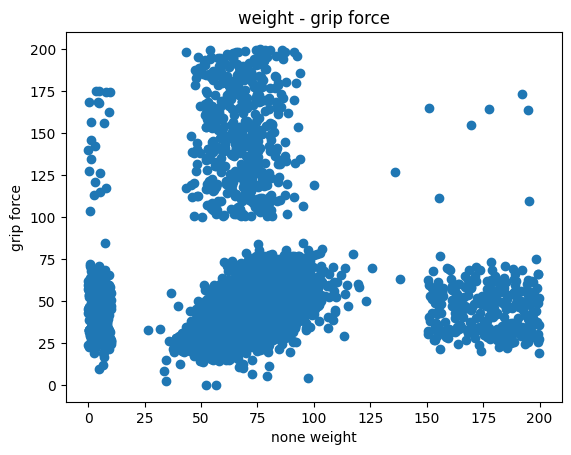

Iteration 0, Cost: 1.0
Iteration 100, Cost: 0.1901131695154472
Iteration 200, Cost: 0.1901081404651855
Iteration 300, Cost: 0.19010311347835274
Iteration 400, Cost: 0.19009808855410235
Iteration 500, Cost: 0.19009306569158801
Iteration 600, Cost: 0.19008804488996373
Iteration 700, Cost: 0.19008302614838396
Iteration 800, Cost: 0.19007801663910506
Iteration 900, Cost: 0.19007300965482196
Iteration 1000, Cost: 0.19006800472491414
Iteration 1100, Cost: 0.19006300184853858
Iteration 1200, Cost: 0.19005800102485282
Iteration 1300, Cost: 0.19005300225301458
Iteration 1400, Cost: 0.190048005532182
Iteration 1500, Cost: 0.19004301086151362
Iteration 1600, Cost: 0.19003801824016808
Iteration 1700, Cost: 0.19003302766730473
Iteration 1800, Cost: 0.1900280391420829
Iteration 1900, Cost: 0.1900230526636626
Iteration 2000, Cost: 0.19001806823120393
Iteration 2100, Cost: 0.19001308584386745
Iteration 2200, Cost: 0.19000810550081398
Iteration 2300, Cost: 0.19000312720120488
Iteration 2400, Cost: 0.18

KeyboardInterrupt: 

In [10]:
# TODO

# (1) Split data
training_dataset, validation_dataset = SplitData(training_datalist, 0.8)
# plotChart('none', 'weight', training_datalist)

# (2) Preprocess data
training_dataset = PreprocessData(training_dataset)
validation_dataset = PreprocessData(validation_dataset)

# (3) Train regression model
w = Regression(training_dataset)

# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
validation_predict_datalist = MakePrediction(w, validation_dataset)
mape = 0
for i in range(len(validation_dataset)):
    mape += abs((validation_dataset[i][-1] - validation_predict_datalist[i]) / validation_dataset[i][-1]) / len(validation_dataset)

print(f"mape = {mape}")

# (5) Make prediction of testing dataset and store the values in output_datalist
output_datalist = MakePrediction(w, testing_datalist)


### *Write the Output File*

Write the prediction to output csv and upload the file to Kaggle
> Format: 'Id', 'gripForce'


In [135]:
# Assume that output_datalist is a list (or 1d array) with length = 100

with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['Id', 'gripForce'])
  for i in range(len(output_datalist)):
    writer.writerow([i,output_datalist[i]])


# 2. Advanced Part (45%)
In the second part, you need to implement regression differently from the basic part to improve your grip force predictions. You must use more than two features.

You can choose either matrix inversion or gradient descent for this part

We have provided `lab1_advanced_training.csv` for your training

> Notice: Be cautious of the "gender" attribute, as it is represented by "F"/"M" rather than a numerical value.

Please save the prediction result in a CSV file and submit it to Kaggle

In [136]:
training_dataroot = 'lab1_advanced_training.csv' # Training data file file named as 'lab1_advanced_training.csv'
testing_dataroot = 'lab1_advanced_testing.csv'   # Testing data file named as 'lab1_advanced_testing.csv'
output_dataroot = 'lab1_advanced.csv' # Output file will be named as 'lab1_advanced.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 3000 elements\

dataType = {'age': 0, 'gender': 1, 'height': 2, 'weight': 3, 'bodyFat': 4, 'diastolic': 5, 'systolic': 6, 'gripForce': 7}

### <i> Load the Input File </i>

In [137]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

### <i> Preprocess Data </i>

In [138]:
def PreprocessDataAdvanced(data, x_type):
    """Preprocess the given dataset and return the result.

    Args:
        data (numpy.ndarray): The dataset to preprocess. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
        x_type (str): The type of attribute
    
    Returns:
        - preprocessedData (numpy.ndarray): Preprocessed data.
    """
    preprocessedData = []
    x_dataType = dataType[x_type]
    y_dataType = dataType['gripForce']

    # TODO
    noNanData = []
    for row in data:
        isNan = np.isnan(row[x_dataType]) or np.isnan(row[y_dataType]) 
        if not isNan:
            noNanData.append(row)
    
    noNanData = np.array(noNanData)
    
    x_data = noNanData[:, x_dataType]
    y_data = noNanData[:, y_dataType]
    
    x_q1 = np.percentile(x_data, 25)
    x_q3 = np.percentile(x_data, 75)
    x_qd = x_q3 - x_q1
    y_q1 = np.percentile(y_data, 25)
    y_q3 = np.percentile(y_data, 75)
    y_qd = y_q3 - y_q1
    
    x_upper_bound = x_q3 + 1.5 * x_qd
    x_lower_bound = x_q1 - 1.5 * x_qd
    y_upper_bound = y_q3 + 1.5 * y_qd
    y_lower_bound = y_q1 - 1.5 * y_qd
    
    for row in range(len(noNanData)):
        x_out_of_bound = x_data[row] > x_upper_bound or x_data[row] < x_lower_bound
        y_out_of_bound = y_data[row] > y_upper_bound or y_data[row] < y_lower_bound
        is_error_data = x_out_of_bound or y_out_of_bound
        
        if (noNanData[row][1] != 'nan' and (not is_error_data)):
            preprocessedData.append(noNanData[row])
            
    preprocessedData = np.array(preprocessedData)

    return preprocessedData

### <i> Split Data by Gender </i>

In [139]:
def SplitMaleAndFemale(data):
    """Split the data by gender

    Args:
        data (2Darray): row data

    Returns:
        maleData,femaleData (2Dnumpy.array, 2Dnumpy.array): maleData, femaleData 
    """
    maleData = []
    femaleData = []
    
    for row in data:
        if row[1] == 'M':
            row[1] = 0
            maleData.append(row)
        elif row[1] == 'F':
            row[1] = 0
            femaleData.append(row)
    
    maleData = np.array(maleData)
    femaleData = np.array(femaleData)
    
    return maleData, femaleData

### <i> Implement Regression </i>

In [140]:
def RegressionAdvanced(dataset, degree, num_attributes):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """
    
    X = []
    for i in range(num_attributes):
        X.append(dataset[:, i:i+1])
    y = dataset[:, num_attributes]

    # Add polynomial features to X
    X_poly = []
    for i in range(num_attributes):
        X_poly_item = np.ones((X[i].shape[0], 1))
        for d in range(1, degree + 1):
            X_poly_item = np.hstack((X_poly_item, X[i] ** d))
        X_poly.append(X_poly_item)

    # Initialize coefficients (weights) to zero
    num_dimensions = X_poly[0].shape[1]  # Number of features (including intercept and polynomial terms)
    w = [] # w = [w_age, w_gender, w_height, w_weight, w_bodyFat, w_diastolic, w_systolic]
    for i in range(num_attributes):
        w.append(np.zeros(num_dimensions))

    # TODO: Set hyperparameters
    num_iteration = 3000000
    learning_rate = 0.000000001

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(num_iteration):
        # TODO: Prediction using current weights and compute error
        predicted_y_vec = []
        for i in range(num_attributes):
            predicted_y_vec.append(X_poly[i].dot(w[i]))
        
        predicted_y = predicted_y_vec[0]
        for i in range(1, num_attributes):
            predicted_y += predicted_y_vec[i]
        
        err = (y - predicted_y)

        # TODO: Compute gradient
        g = [] # g = [g_age, g_gender, g_height, g_weight, g_bodyFat, g_diastolic, g_systolic]
        for i in range(num_attributes):
            g.append(-2 * X_poly[i].T.dot(err))

        # TODO: Update the weights
        for row in range(num_attributes):
            w[row] = w[row] - (learning_rate) * g[row]

        # TODO: Optionally, print the cost every 100 iterations
        if iteration % 100 == 0:
            cost = np.sum((1 / m) * abs(err / y))
            print(f"Iteration {iteration}, Cost: {cost}")
            
                
    w = np.array(w)
    
    return w


### <i> Make Prediction </i>

In [141]:
def MakePredictionAdvanced(w_male, w_female, test_dataset, num_attributes):
    """
    Predicts the output for a given test dataset using a regression model.

    Parameters:
    - w_male (numpy.ndarray): The coefficients of the model (male), where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - w_female (numpy.ndarray): The coefficients of the model (female), where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - test_dataset (numpy.ndarray): A 1D array containing the input values (independent variable)
                                          for which predictions are to be made.
    - num_attributes (int): The number of the types of x

    Returns:
    - list/numpy.ndarray: A list or 1d array of predicted values corresponding to each input value in the test dataset.
    """
    test_dataset_x = test_dataset[:, :num_attributes]
    degree = w_male.shape[1]
    prediction = []
    w_male_coef = []
    w_female_coef = []
    
    for i in range(degree):
        w_male_coef.append(w_male[:, i:i+1])
        w_female_coef.append(w_female[:, i:i+1])
    
    y = []
    
    for row in range(len(test_dataset_x)):
        if test_dataset_x[row][1] == 'M':
            test_dataset_x[row][1] = 0
            tmp_y = np.sum(w_male_coef[0])
            for i in range(1, degree):
                tmp_y += test_dataset_x[row].dot(w_male_coef[i])[0]
            y.append(tmp_y)
        else:
            test_dataset_x[row][1] = 0
            tmp_y = np.sum(w_female_coef[0])
            for i in range(1, degree):
                tmp_y += test_dataset_x[row].dot(w_female_coef[i])[0]
            y.append(tmp_y)
    
    prediction = np.array(y)
    return prediction



### <i> Main </i>

In [143]:
# (1) Split data
training_dataset, validation_dataset = SplitData(training_datalist, 0.8)

# (2) Preprocess data
training_dataset_age = PreprocessDataAdvanced(training_dataset, 'age')
validation_dataset_age = PreprocessDataAdvanced(validation_dataset, 'age')
training_dataset_height = PreprocessDataAdvanced(training_dataset_age, 'height')
validation_dataset_height = PreprocessDataAdvanced(validation_dataset_age, 'height')
training_dataset_weight = PreprocessDataAdvanced(training_dataset_height, 'weight')
validation_dataset_weight = PreprocessDataAdvanced(validation_dataset_height, 'weight')
training_dataset_bodyFat = PreprocessDataAdvanced(training_dataset_weight, 'bodyFat')
validation_dataset_bodyFat = PreprocessDataAdvanced(validation_dataset_weight, 'bodyFat')
training_dataset_diastolic = PreprocessDataAdvanced(training_dataset_bodyFat, 'diastolic')
validation_dataset_diastolic = PreprocessDataAdvanced(validation_dataset_bodyFat, 'diastolic')
training_dataset = PreprocessDataAdvanced(training_dataset_diastolic, 'systolic')
validation_dataset = PreprocessDataAdvanced(validation_dataset_diastolic, 'systolic')

training_dataset_male, training_dataset_female = SplitMaleAndFemale(training_dataset)

# (3) Train regression model
w_male = RegressionAdvanced(training_dataset_male, 1, 7)
w_female = RegressionAdvanced(training_dataset_female, 1, 7)

# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
validation_predict_datalist = MakePredictionAdvanced(w_male, w_female, validation_dataset, 7)
mape = 0
for i in range(len(validation_dataset)):
    mape += (1 / len(validation_dataset)) * abs((validation_dataset[i][-1] - validation_predict_datalist[i]) / validation_dataset[i][-1])
print(f"mape = {mape}")

# (5) Make prediction of testing dataset and store the values in output_datalist
output_datalist = MakePredictionAdvanced(w_male, w_female, testing_datalist, 7)

Iteration 0, Cost: 1.0000000000000888
Iteration 100, Cost: 0.13504366551936947
Iteration 200, Cost: 0.1325118305255476
Iteration 300, Cost: 0.13059828519029795
Iteration 400, Cost: 0.12914786432080108
Iteration 500, Cost: 0.12803992819109727
Iteration 600, Cost: 0.1271835130116118
Iteration 700, Cost: 0.12649527695983404
Iteration 800, Cost: 0.1259251079343827
Iteration 900, Cost: 0.1254320246556321
Iteration 1000, Cost: 0.12499369656446671
Iteration 1100, Cost: 0.12460799530134103
Iteration 1200, Cost: 0.12426740229738716
Iteration 1300, Cost: 0.12395395403197215
Iteration 1400, Cost: 0.12366516476798964
Iteration 1500, Cost: 0.12339435044676367
Iteration 1600, Cost: 0.12313988574548683
Iteration 1700, Cost: 0.12289831939860946
Iteration 1800, Cost: 0.12266681497721627
Iteration 1900, Cost: 0.122444616884358
Iteration 2000, Cost: 0.12223095838940878
Iteration 2100, Cost: 0.1220245144755301
Iteration 2200, Cost: 0.12182427450054141
Iteration 2300, Cost: 0.12162889072673946
Iteration 24

### <i> Write the Output File </i>

In [144]:
# Assume that output_datalist is a list (or 1d array) with length = 3000
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['Id', 'gripForce'])
  for i in range(len(output_datalist)):
    writer.writerow([i,output_datalist[i]])

# Save the Code File
Please save your code and submit it as an ipynb file! (**Lab1.ipynb**)